# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install  pip
!pip install setuptools==60.2.0  #may be removed in the end
!pip install setuptools wheel
!pip install  "mxnet<2.0.0" bokeh==3.4.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-60.2.0-py3-none-any.whl.metadata (5.1 kB)
Using cached setuptools-60.2.0-py3-none-any.whl (953 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 262.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 259.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 203.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 219.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "monisendo"
kaggle_key = "e3b07d4adfd7308587aa9aff9e07f4c4"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!pip install kaggle
!kaggle competitions download -c bike-sharing-demand
#kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  Using cached kaggle-1.6.12-py3-none-any.whl
bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()
train.info()  ##No Null entries no need for train.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor =TabularPredictor(label = "count", eval_metric = "root_mean_squared_error").fit(train_data = train.drop(["casual", "registered"], axis=1), presets = "best_quality", time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_133618"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_133618/ds_sub_fit/sub_fit_ho.
2024-05-05 13:36:19,031	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.

(raylet) A worker died or was killed while executing a task by an unexpected system error. To troubleshoot the problem, check the logs for the dead worker. RayTask ID: 24630f2f0e8e1bb19b4f81cddd430ee51797600f01000000 Worker ID: f66b5aea90227bd5593d1818dafd0d4667822c671ff5c5a9f0a84489 Node ID: b09314b9225f478badab21e174851f528056e26d6ff757ef442ec4f8 Worker IP address: 169.255.255.2 Worker port: 35955 Worker PID: 27531 Worker exit type: SYSTEM_ERROR Worker exit detail: Worker exits unexpectedly. Worker exits with an exit code 1. The process receives a SIGTERM.


### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.178435  root_mean_squared_error      20.058672  374.391584                0.000708           0.035331            3       True         12
1   RandomForestMSE_BAG_L2  -53.467045  root_mean_squared_error      15.558106  290.706487                0.932992          36.734302            2       True         11
2          LightGBM_BAG_L2  -55.176664  root_mean_squared_error      14.914586  281.038961                0.289471          27.066776            2       True         10
3        LightGBMXT_BAG_L2  -60.564589  root_mean_squared_error      18.835502  310.555176                4.210387          56.582990            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.095798    0.062473   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.84522968959655,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()


0    23.318624
1    42.264240
2    45.596268
3    48.542400
4    51.604290
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
predictions[predictions > 0] #6493 all positive
predictions.describe() # number of entries is 6493

count    6493.000000
mean      100.387726
std        89.972275
min         3.084028
25%        19.507645
50%        63.924435
75%       168.071320
max       367.742279
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
num_negative_predictions = sum(predictions[predictions < 0])
num_negative_predictions

0

In [ ]:
# Set them to zero
predictions[predictions < 0]=0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 663kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status   publicScore  privateScore  
--------------  -------------------  --------------------  -------  -----------  ------------  
submission.csv  2024-05-05 13:59:34  first raw submission  pending                             


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

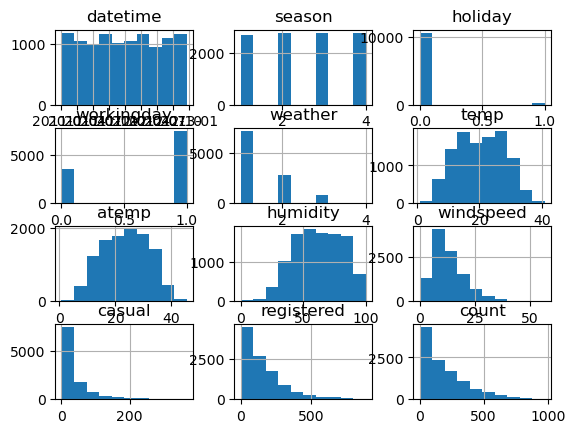

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

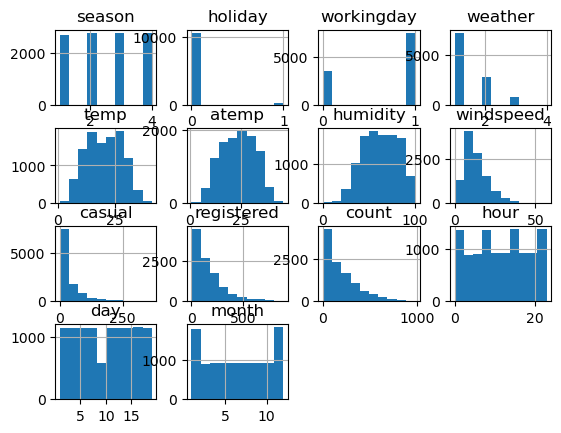

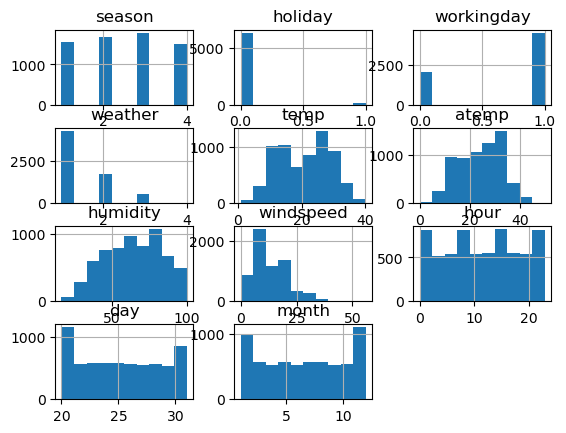

In [ ]:
# create a new feature
train['datetime'] .dt.month
train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour
train["day"] = train["datetime"].dt.day
test["day"] = test["datetime"].dt.day
train["month"] = train["datetime"].dt.month
test["month"] = test["datetime"].dt.month
##dropping datetime column to prevent closely correlated features
train = train.drop("datetime", axis=1)
test = test.drop("datetime", axis=1)
##viewing new histogram
train.hist()
test.hist()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] =train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')


In [ ]:
# View are new feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


array([[<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

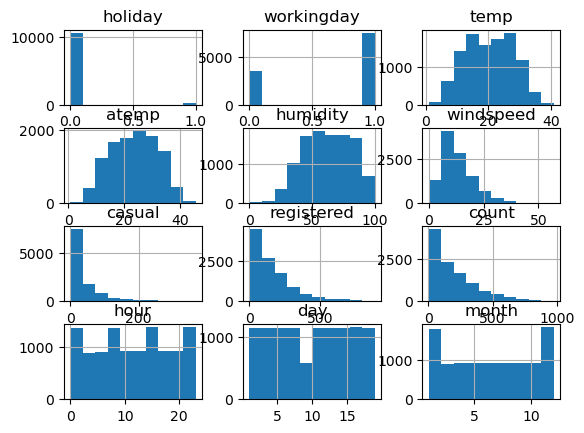

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label = "count", eval_metric = "root_mean_squared_error").fit(train_data = train.drop(["casual", "registered"], axis=1), presets = "best_quality", time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_141211"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_141211/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 194 seconds

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.066331  root_mean_squared_error      59.895862  342.262399                0.000909           0.044278            3       True         12
1          CatBoost_BAG_L2  -50.351641  root_mean_squared_error      59.160169  291.888968                0.102328          42.355733            2       True         11
2          LightGBM_BAG_L2  -50.939850  root_mean_squared_error      59.150002  269.885340                0.092161          20.352105            2       True          9
3   RandomForestMSE_BAG_L2  -51.045121  root_mean_squared_error      59.700464  279.510283                0.642623          29.977048            2       True         10
4      WeightedEnsemble_L2  -51.391593  root_mean_squared_error      58.581797  207.853812   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -123.93326033133259,
  'KNeighborsDist_BAG_L1': -119.36560130583281,
  'LightGBMXT_BAG_L1': -52.705795649247634,
  'LightGBM_BAG_L1': -53.032741303524304,
  'RandomForestMSE_BAG_L1': -64.11630908712874,
  'CatBoost_BAG_L1': -65.46471779965741,
  'WeightedEnsemble_L2': -51.39159293222627,
  'LightGBMXT_BAG_L

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    33.809742
1     5.790374
2     4.663260
3     4.635255
4     4.537446
Name: count, dtype: float32

In [ ]:
predictions_new_features[predictions_new_features<0]

28     -0.980780
118    -3.303921
120    -1.700267
165    -0.644836
166    -2.082792
167    -2.130274
891    -0.650284
1515   -0.476856
3277   -0.043278
3296   -1.104796
3297   -2.188800
3298   -1.186934
3322   -2.403736
3369   -0.392683
3394   -2.187136
3395   -0.687953
3584   -0.082433
3607   -2.160980
4183   -0.553806
6044   -0.525928
6045   -0.409025
6069   -0.207194
6473   -1.531261
Name: count, dtype: float32

In [ ]:
predictions_new_features[predictions_new_features<0]=0

In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 695kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-05 14:38:08  new features          complete  0.56963      0.56963       
submission.csv               2024-05-05 13:59:34  first raw submission  complete  1.8088       1.8088        


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
hyperparameters = {
    'GBM': {'num_boost_round': 100, 'num_leaves': 31},  # LightGBM
    'RF': {'n_estimators': 100}  # Random Forest
}

predictor_new_hpo = TabularPredictor(label = "count", eval_metric = "root_mean_squared_error").fit(train_data = train.drop(["casual", "registered"], axis=1), presets = "best_quality", time_limit = 800, hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_162600"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 800 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_162600/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 78 seconds 

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -63.337071  root_mean_squared_error       0.987848  50.625458                0.000698           0.048901            3       True          6
1      LightGBM_BAG_L2 -63.882394  root_mean_squared_error       0.623369  42.374804                0.094467          19.557048            2       True          4
2  WeightedEnsemble_L2 -64.086323  root_mean_squared_error       0.529529  22.830751                0.000627           0.012995            2       True          3
3  RandomForest_BAG_L1 -64.694136  root_mean_squared_error       0.390234   4.551334                0.390234           4.551334            1       True          2
4  RandomForest_BAG_L2 -64.952825  root_mean_squared_error       0.892684  31.019509                0.363781           8.20

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -67.9619347943584,
  'RandomForest_BAG_L1': -64.69413585672993,
  'WeightedEnsemble_L2': -64.08632282981748,
  'LightGBM_BAG_L2': -63.88239416412801,
  'RandomForest_BAG_L2': -64.95282508384382,
  'WeightedEnsemble_L3': -63.33707111857008},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'LightGBM_BAG_L2': ['LightGBM_BAG_L2'],
  'RandomForest_BAG_L2': ['RandomForest_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'LightGBM_BAG_L1': 18.266421794891357,
 

In [ ]:
# Remember to set all negative values to zero
predictions_hyp = predictor_new_hpo.predict(test)
predictions_hyp.head()

0    16.847305
1     8.675467
2     7.940484
3     6.218262
4     6.190484
Name: count, dtype: float32

In [ ]:
predictions_hyp[predictions_hyp<0]=0

In [ ]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("submission_new_features.csv", parse_dates=["datetime"])

submission_new_hpo["count"] = predictions_hyp
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 708kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-05 15:38:56  new features with hyperparameters  complete  0.53443      0.53443       
submission_new_features.csv  2024-05-05 14:38:08  new features                       complete  0.56963      0.56963       
submission.csv               2024-05-05 13:59:34  first raw submission               complete  1.8088       1.8088        


#### New Score of `?`

In [ ]:
from autogluon.common import space
## From autogluon documentation

# Neural Network model
nn = {  
    'num_epochs': 10,  
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': space.Categorical('relu', 'softrelu', 'tanh'), 
    'layers': space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  
    'dropout_prob': space.Real(0.0, 0.5, default=0.1), 
}
hyperparameters={
                   'NN_TORCH': nn  
                  }  
hp_tune_kwargs = {
    'num_trials': 2,  # number of hyperparameter configurations to try
    'scheduler' : 'local',
    'searcher': 'auto'  # method for searching hyperparameters
}

predictor_new_hpo2= TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train.drop(["casual", "registered"], axis=1),
    presets='best_quality',
    time_limit=600,
    hyperparameters='light',  # use a smaller set of models
    hyperparameter_tune_kwargs=hp_tune_kwargs
)


 
predictor_new_hpo2.fit_summary()
# Remember to set all negative values to zero
predictions_hyp2 = predictor_new_hpo2.predict(test)
predictions_hyp2.head()
predictions_hyp2[predictions_hyp2<0]=0

No path specified. Models will be saved in: "AutogluonModels/ag-20240505_173002"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_173002/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 167 seconds

  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.54%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-56.4082	 = Validation score   (-root_mean_squared_error)
	53.34s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 28.85s of the 379.31s of remaining time.


  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.44%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-53.4529	 = Validation score   (-root_mean_squared_error)
	58.33s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 28.85s of the 320.81s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-65.5903	 = Validation score   (-root_mean_squared_error)
	13.26s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 28.85s of the 307.48s of remaining time.


  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.47%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-69.169	 = Validation score   (-root_mean_squared_error)
	36.75s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 28.85s of the 270.58s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-65.1488	 = Validation score   (-root_mean_squared_error)
	6.71s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L1 ... Tuning model for up to 28.85s of the 263.81s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, i

  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.54%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-55.7311	 = Validation score   (-root_mean_squared_error)
	39.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 28.85s of the 223.74s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparam

  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.72%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-53.0157	 = Validation score   (-root_mean_squared_error)
	29.93s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 16.27s of the 132.56s of remaining time.


  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.61%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-51.6047	 = Validation score   (-root_mean_squared_error)
	26.79s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 16.27s of the 105.54s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-51.8352	 = Validation score   (-root_mean_squared_error)
	31.57s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 16.27s of the 73.83s of remaining time.


  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.76%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-52.9857	 = Validation score   (-root_mean_squared_error)
	27.38s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 16.27s of the 46.22s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-51.6443	 = Validation score   (-root_mean_squared_error)
	9.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L2 ... Tuning model for up to 16.27s of the 36.23s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in 

  0%|          | 0/2 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.87%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-51.6468	 = Validation score   (-root_mean_squared_error)
	27.01s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 16.27s of the 8.9s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparamete

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -51.051869  root_mean_squared_error       4.273432  389.508574                0.000871           0.064520            3       True         16
1       LightGBM_BAG_L2/T1 -51.604666  root_mean_squared_error       4.001564  288.496221                0.000172          26.792428            2       True         10
2     ExtraTreesMSE_BAG_L2 -51.644309  root_mean_squared_error       4.001673  271.607354                0.000281           9.903561            2       True         13
3        XGBoost_BAG_L2/T1 -51.646770  root_mean_squared_error       4.001539  288.715829                0.000147          27.012036            2       True         14
4   RandomForestMSE_BAG_L2 -51.835190  root_mean_squared_error       4.001580  293.277671         

In [ ]:
 submission_new_hpo_second = pd.read_csv("submission_new_hpo2.csv", parse_dates=["datetime"])

submission_new_hpo_second["count"] = predictions_hyp2
submission_new_hpo_second.to_csv("submission_new_hposecond.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hposecond.csv -m "new features with hyperparameters-2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 712kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                          status    publicScore  privateScore  
----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hposecond.csv  2024-05-05 17:44:29  new features with hyperparameters-2  complete  0.55111      0.55111       
submission_new_hpo.csv        2024-05-05 16:47:07  new features with hyperparameters2   complete  0.53443      0.53443       
submission_new_hpo.csv        2024-05-05 16:41:54  new features with hyperparameters2   complete  0.53443      0.53443       
submission_new_hpo.csv        2024-05-05 16:18:46  new features with hyperparameters2   complete  0.53443      0.53443       


In [ ]:
from autogluon.common import space
## From autogluon documentation

# Neural Network model
nn = {  
    'num_epochs': 10,  
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  
    'activation': space.Categorical('relu', 'softrelu', 'tanh'), 
    'layers': space.Categorical([100], [1000], [200, 100], [300, 200, 100]),  
    'dropout_prob': space.Real(0.0, 0.5, default=0.1), 
}
hyperparameters={
                   'NN_TORCH': nn ,
                   'GBM': {'num_boost_round': 100, 'num_leaves': 31},  # LightGBM
                   'RF': {'n_estimators': 100}  # Random Forest
    
    
                  }  
hp_tune_kwargs = {
    'num_trials': 3,  # number of hyperparameter configurations to try increased
    'scheduler' : 'local',
    'searcher': 'auto'  # method for searching hyperparameters
}

predictor_new_hpo3 = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train.drop(["casual", "registered"], axis=1),
    presets='best_quality',
    time_limit=700, #increase time
    hyperparameters='light',  # use a smaller set of models
    hyperparameter_tune_kwargs=hp_tune_kwargs
)


 
predictor_new_hpo3.fit_summary()
# Remember to set all negative values to zero
predictions_hyp3 = predictor_new_hpo3.predict(test)
predictions_hyp3.head()


No path specified. Models will be saved in: "AutogluonModels/ag-20240505_165223"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 700 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_165223/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 252 seconds

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.60%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-55.7255	 = Validation score   (-root_mean_squared_error)
	56.47s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 29.84s of the 391.02s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.44%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-53.2197	 = Validation score   (-root_mean_squared_error)
	51.98s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 29.84s of the 338.86s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-65.5903	 = Validation score   (-root_mean_squared_error)
	11.82s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 29.84s of the 326.98s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.47%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-67.5253	 = Validation score   (-root_mean_squared_error)
	36.25s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 29.84s of the 290.57s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-65.1488	 = Validation score   (-root_mean_squared_error)
	6.59s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L1 ... Tuning model for up to 29.84s of the 283.92s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, 

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.53%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-55.7237	 = Validation score   (-root_mean_squared_error)
	37.76s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 29.84s of the 245.83s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparam

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.70%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-52.971	 = Validation score   (-root_mean_squared_error)
	27.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 18.48s of the 156.8s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.69%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-51.2463	 = Validation score   (-root_mean_squared_error)
	25.96s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 18.48s of the 130.66s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-51.5496	 = Validation score   (-root_mean_squared_error)
	28.63s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 18.48s of the 101.95s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.75%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-52.099	 = Validation score   (-root_mean_squared_error)
	30.14s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 18.48s of the 71.57s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-51.4531	 = Validation score   (-root_mean_squared_error)
	9.17s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L2 ... Tuning model for up to 18.48s of the 62.28s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in 

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.85%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-50.9958	 = Validation score   (-root_mean_squared_error)
	29.46s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 18.48s of the 32.37s of remaining time.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparame

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -50.660020  root_mean_squared_error       3.603486  381.417891                0.001526           0.080934            3       True         16
1        XGBoost_BAG_L2/T1 -50.995794  root_mean_squared_error       3.383039  283.997006                0.000194          29.463234            2       True         14
2       LightGBM_BAG_L2/T1 -51.246322  root_mean_squared_error       3.383015  280.497164                0.000170          25.963392            2       True         10
3     ExtraTreesMSE_BAG_L2 -51.453146  root_mean_squared_error       3.383074  263.703885                0.000229           9.170113            2       True         13
4   RandomForestMSE_BAG_L2 -51.549588  root_mean_squared_error       3.383376  283.162254         

In [ ]:
predictions_hyp3[predictions_hyp3<0]=0

In [ ]:
submission_new_hpo_third= pd.read_csv("submission_new_hpo2.csv", parse_dates=["datetime"])

submission_new_hpo_third["count"] = predictions_hyp3
submission_new_hpo_third.to_csv("submission_new_hpo_third.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_third.csv -m "new features with hyperparameters3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 657kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                          status    publicScore  privateScore  
----------------------------  -------------------  -----------------------------------  --------  -----------  ------------  
submission_new_hpo_third.csv  2024-05-05 17:45:05  new features with hyperparameters3   complete  0.5497       0.5497        
submission_new_hposecond.csv  2024-05-05 17:44:29  new features with hyperparameters-2  complete  0.55111      0.55111       
submission_new_hpo.csv        2024-05-05 16:47:07  new features with hyperparameters2   complete  0.53443      0.53443       
submission_new_hpo.csv        2024-05-05 16:41:54  new features with hyperparameters2   complete  0.53443      0.53443       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

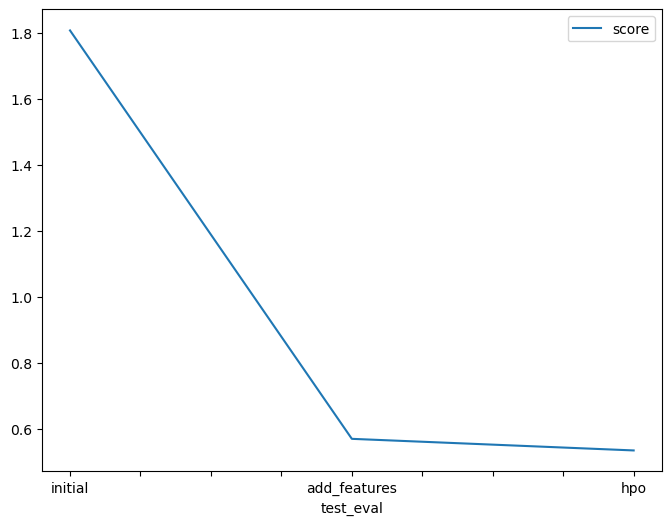

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.8088, 0.56963,0.53443 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

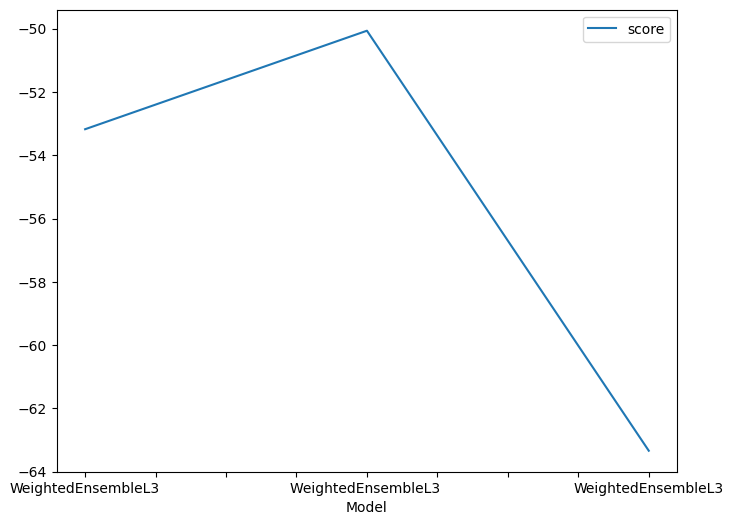

In [ ]:
# Take the 3 training scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "Model": ["WeightedEnsembleL3", "WeightedEnsembleL3 ", "WeightedEnsembleL3"],
        "score": [-53.178435, -50.066331, -63.337071]
    }
).plot(x="Model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "GBM,RF"],
    "hpo2": ["default", "default", "NN_TORCH "],
    "hpo3": ["default", "default", "NN_Torch,GBM,RF,autotune"],
    "score": [0.53433, 0.55111, 0.5497]
})


,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,0.53433
1,add_features,default,default,default,0.55111
2,hpo,"GBM,RF",NN_TORCH,"NN_Torch,GBM,RF,autotune",0.54970


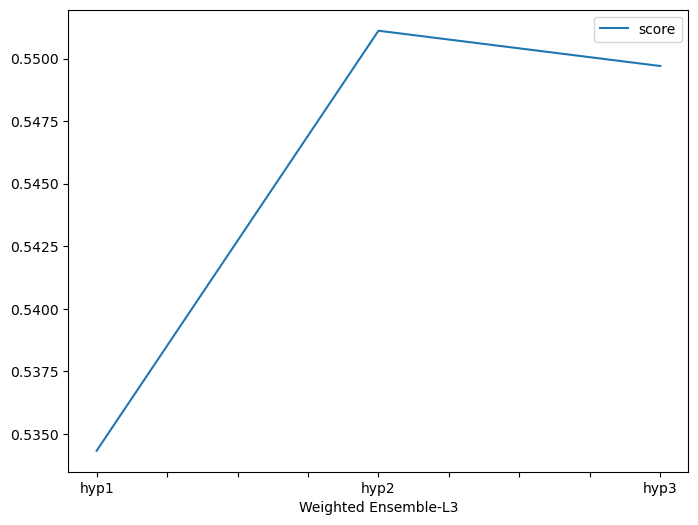

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "Weighted Ensemble-L3": ["hyp1", "hyp2", "hyp3"],
        "score": [0.53433, 0.55111, 0.5497]
    }
).plot(x="Weighted Ensemble-L3", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_Top_score.png')